In [ ]:
Q1. You are working on a machine learning project where you have a dataset containing numerical and
categorical features. You have identified that some of the features are highly correlated and there are
missing values in some of the columns. You want to build a pipeline that automates the feature
engineering process and handles the missing valuesD
 Design a pipeline that includes the following steps"
    Use an automated feature selection method to identify the important features in the datasetC
    Create a numerical pipeline that includes the following steps"
    Impute the missing values in the numerical columns using the mean of the column valuesC
    Scale the numerical columns using standardisationC
    Create a categorical pipeline that includes the following steps"
    Impute the missing values in the categorical columns using the most frequent value of the columnC
    One-hot encode the categorical columnsC
    Combine the numerical and categorical pipelines using a ColumnTransformerC
    Use a Random Forest Classifier to build the final modelC
    Evaluate the accuracy of the model on the test datasetD
Note! Your solution should include code snippets for each step of the pipeline, and a brief explanation of
each step. You should also provide an interpretation of the results and suggest possible improvements for
the pipelineD

In [80]:
import seaborn as sns

In [81]:
df=sns.load_dataset('penguins')

In [82]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [83]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [84]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [85]:
df=df.dropna()

In [86]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<AxesSubplot: >

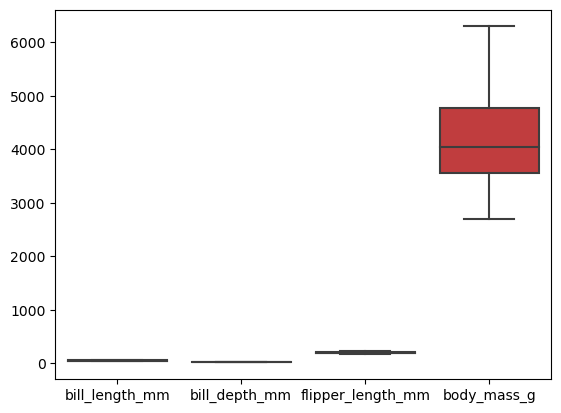

In [87]:
sns.boxplot(data=df)

In [88]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [89]:
encode=LabelEncoder()

In [90]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [91]:
df['species']=encode.fit_transform(df['species'])

In [92]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


In [93]:
df.species.unique()

array([0, 1, 2])

In [94]:
df['island']=encode.fit_transform(df['island'])

In [95]:
df.island.unique()

array([2, 0, 1])

In [96]:
one=OneHotEncoder()

In [97]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [98]:
df['sex']=encode.fit_transform(df['sex'])

In [99]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [100]:
x=df.drop('species',axis=1)

In [101]:
y=df['species']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [105]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [106]:
cat_col=['island','sex']
numerical_col=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [107]:
num_pipe=Pipeline(
     steps=[('imputer',SimpleImputer(strategy='median')),
             ('scaler',StandardScaler())
            ]
)
cat_pipe=Pipeline(
    steps=[('imputer',SimpleImputer(strategy='most_frequent')),
           ('onehotencoder',OneHotEncoder())
          ]
)

In [108]:
preprocessor=ColumnTransformer([
    ('num_pipe',num_pipe,numerical_col),
    ('cat_pipe',cat_pipe,cat_col)
])

In [109]:
x_train=preprocessor.fit_transform(x_train)

In [111]:
x_test=preprocessor.transform(x_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier
models={'Random forest classifier':RandomForestClassifier()}

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
def evaluate_models(x_train,x_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        test_modelscore=accuracy_score(y_pred,y_test)
        report[list(models.keys())[i]]=test_modelscore
    return report

In [115]:
model_report=evaluate_models(x_train,x_test,y_train,y_test,models)

In [116]:
model_report

{'Random forest classifier': 1.0}

In [ ]:
Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then
use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its
accuracy.

In [117]:
import seaborn as sns

In [120]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

In [119]:
df=sns.load_dataset('iris')

In [121]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
from sklearn.preprocessing import LabelEncoder

In [126]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [128]:
encode=LabelEncoder()

In [129]:
df['species']=encode.fit_transform(df['species'])

In [130]:
y=df['species']

In [131]:
x=df.drop('species',axis=1)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [137]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [138]:
numerical_col=['sepal_length','sepal_width','petal_length','petal_width']

In [139]:
num_pipeline=Pipeline(
     steps=[
          ('imputer',SimpleImputer(strategy='median')),
          ('scaler',StandardScaler())
     ]
)

In [141]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_col)
])

In [142]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [143]:
pipe = Pipeline([
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression())
    ])

# Create VotingClassifier
voting = VotingClassifier(estimators=[('rf', pipe['rf']), ('lr', pipe['lr'])], voting='hard')

# Fit pipeline 
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())])

In [144]:
y_pred=voting.predict(x_test)

In [145]:
accuracy_score(y_pred,y_test)

1.0